In [1]:
# Common imports
import numpy as np
import pandas as pd
np.random.seed(42)

In [2]:
flippers = pd.read_csv("INPUTS.csv")
flippers.head()

,EFF_AGE,ACT_AGE,LND_SQFOOT,TOT_LVG_AREA,S_LEGAL,CONST_CLASS,IMP_QUAL,JV,LND_VAL,NO_BULDNG,NCONST_VAL,DEL_VAL,SPEC_FEAT_VAL,MonthDifference,SALE_PRC1,Target_Var
0,23,23,20850,1453,LOTS 13 TO 18 INC BLK L 4TH AD,0,3,154349,13755,1,0,0,13661,5,205000,0
1,18,22,10000,1330,LOT 8 BLK 266 DELTONA LAKES UN,0,3,149271,20400,1,0,0,278,3,210000,0
2,7,30,10000,1395,LOT 9 BLK 322 DELTONA LAKES UN,0,3,169016,21200,1,0,0,0,5,199900,0
3,12,20,10000,1551,LOT 9 BLK 370 DELTONA LAKES UN,0,3,167252,21200,1,0,0,142,4,186000,0
4,42,42,10250,1702,LOT 7 BLK 366 DELTONA LAKES UN,0,3,130450,24600,1,0,0,897,4,219900,0


In [3]:
flippers.shape

(401723, 16)

In [4]:
# Sampling 30% of the data set due to the hardware limitations to derive Feature Importance
# when 100% of the data set processed, system asked for 200 GB of Ram
# Accuracy and Confusion Matrix reported on the final report were derived from 100% of origianl data set
flippers = flippers.sample(frac=0.30)

In [5]:
flippers.shape

(120517, 16)

In [6]:
flippers.dtypes

EFF_AGE             int64
ACT_AGE             int64
LND_SQFOOT          int64
TOT_LVG_AREA        int64
S_LEGAL            object
CONST_CLASS         int64
IMP_QUAL            int64
JV                  int64
LND_VAL             int64
NO_BULDNG           int64
NCONST_VAL          int64
DEL_VAL             int64
SPEC_FEAT_VAL       int64
MonthDifference     int64
SALE_PRC1           int64
Target_Var          int64
dtype: object

## Splitting the data into train and test sets

In [7]:
#Splitting Data
from sklearn.model_selection import train_test_split
train, test = train_test_split(flippers, test_size=0.3)

In [8]:
#Checking for missing values
train.isna().sum()

EFF_AGE            0
ACT_AGE            0
LND_SQFOOT         0
TOT_LVG_AREA       0
S_LEGAL            0
CONST_CLASS        0
IMP_QUAL           0
JV                 0
LND_VAL            0
NO_BULDNG          0
NCONST_VAL         0
DEL_VAL            0
SPEC_FEAT_VAL      0
MonthDifference    0
SALE_PRC1          0
Target_Var         0
dtype: int64

In [9]:
train.isnull()

,EFF_AGE,ACT_AGE,LND_SQFOOT,TOT_LVG_AREA,S_LEGAL,CONST_CLASS,IMP_QUAL,JV,LND_VAL,NO_BULDNG,NCONST_VAL,DEL_VAL,SPEC_FEAT_VAL,MonthDifference,SALE_PRC1,Target_Var
25904,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
230541,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97854,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27868,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
77717,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366127,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
217762,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36882,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
142628,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [11]:
#Separating Target Variable
train_y = train[['Target_Var']]
test_y = test[['Target_Var']]

#Removing Target, Profit_Loss and SALE_PRC2 from the Data Set
train_x = train.drop(['Target_Var'], axis =1)
test_x = test.drop(['Target_Var'], axis =1)   

In [12]:
train_x.shape

(84361, 15)

In [13]:
#Transforming Data Types for Numeric Columns which are categorical in nature:
#Int
flippers[['EFF_AGE','ACT_AGE','LND_SQFOOT','TOT_LVG_AREA','JV','LND_VAL',
        'NO_BULDNG','NCONST_VAL','DEL_VAL','SPEC_FEAT_VAL','MonthDifference'
        ,'SALE_PRC1']]=flippers[['EFF_AGE','ACT_AGE','LND_SQFOOT','TOT_LVG_AREA','JV','LND_VAL',
        'NO_BULDNG','NCONST_VAL','DEL_VAL','SPEC_FEAT_VAL','MonthDifference','SALE_PRC1']].astype(int)

#Str
flippers[['S_LEGAL','IMP_QUAL','CONST_CLASS']]=flippers[['S_LEGAL','IMP_QUAL'
,'CONST_CLASS']].astype(str)


In [56]:
flippers.dtypes

EFF_AGE             int32
ACT_AGE             int32
LND_SQFOOT          int32
TOT_LVG_AREA        int32
S_LEGAL            object
CONST_CLASS        object
IMP_QUAL           object
JV                  int32
LND_VAL             int32
NO_BULDNG           int32
NCONST_VAL          int32
DEL_VAL             int32
SPEC_FEAT_VAL       int32
MonthDifference     int32
SALE_PRC1           int32
Target_Var          int64
dtype: object

In [14]:
numeric_columns = ['EFF_AGE','ACT_AGE','LND_SQFOOT','TOT_LVG_AREA','JV','LND_VAL',
                  'NO_BULDNG','NCONST_VAL','DEL_VAL','SPEC_FEAT_VAL','MonthDifference','SALE_PRC1']

categorical_columns = ['S_LEGAL','IMP_QUAL','CONST_CLASS']

In [15]:
numeric_columns

['EFF_AGE',
 'ACT_AGE',
 'LND_SQFOOT',
 'TOT_LVG_AREA',
 'JV',
 'LND_VAL',
 'NO_BULDNG',
 'NCONST_VAL',
 'DEL_VAL',
 'SPEC_FEAT_VAL',
 'MonthDifference',
 'SALE_PRC1']

In [16]:
categorical_columns

['S_LEGAL', 'IMP_QUAL', 'CONST_CLASS']

In [17]:
train.isna().sum()

EFF_AGE            0
ACT_AGE            0
LND_SQFOOT         0
TOT_LVG_AREA       0
S_LEGAL            0
CONST_CLASS        0
IMP_QUAL           0
JV                 0
LND_VAL            0
NO_BULDNG          0
NCONST_VAL         0
DEL_VAL            0
SPEC_FEAT_VAL      0
MonthDifference    0
SALE_PRC1          0
Target_Var         0
dtype: int64

In [18]:
# Numeric Transformer
numeric_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [19]:
#Categorical Transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [20]:
#Preprocessor
preprocessor = ColumnTransformer([
    ('num',numeric_transformer,numeric_columns),
    ('cat', categorical_transformer, categorical_columns)
  
])

In [21]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_x)

train_x

<84361x45786 sparse matrix of type '<class 'numpy.float64'>'
	with 1265415 stored elements in Compressed Sparse Row format>

In [22]:
#Fit and transform the test data
test_x = preprocessor.transform(test_x)

test_x

<36156x45786 sparse matrix of type '<class 'numpy.float64'>'
	with 528313 stored elements in Compressed Sparse Row format>

In [23]:
type(train_x), type(test_x)

(scipy.sparse._csr.csr_matrix, scipy.sparse._csr.csr_matrix)

In [24]:
train_x.shape, test_x.shape

((84361, 45786), (36156, 45786))

In [25]:
#Retrieving the column names:
preprocessor.get_feature_names_out()

array(['num__EFF_AGE', 'num__ACT_AGE', 'num__LND_SQFOOT', ...,
       'cat__CONST_CLASS_3', 'cat__CONST_CLASS_4', 'cat__CONST_CLASS_5'],
      dtype=object)

In [26]:
# Check if your scikit-learn version is below 1.1.1

import sklearn

sklearn.__version__

'1.1.2'

In [27]:
# Now we can retrieve the column names:

preprocessor.get_feature_names_out()

array(['num__EFF_AGE', 'num__ACT_AGE', 'num__LND_SQFOOT', ...,
       'cat__CONST_CLASS_3', 'cat__CONST_CLASS_4', 'cat__CONST_CLASS_5'],
      dtype=object)

In [28]:
from scipy.sparse import csr_matrix

In [29]:
train_x1 = pd.DataFrame.sparse.from_spmatrix(train_x)
test_x1 = pd.DataFrame.sparse.from_spmatrix(test_x)

In [30]:
type(train_x1), type(test_x1)


(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [31]:
train_x1.shape, test_x1.shape

((84361, 45786), (36156, 45786))

In [32]:
#If you wanted, you can recreate the data set in the processed format:

flippers_train_processed = pd.DataFrame(train_x1, columns=preprocessor.get_feature_names_out())

flippers_train_processed

,num__EFF_AGE,num__ACT_AGE,num__LND_SQFOOT,num__TOT_LVG_AREA,num__JV,num__LND_VAL,num__NO_BULDNG,num__NCONST_VAL,num__DEL_VAL,num__SPEC_FEAT_VAL,...,cat__IMP_QUAL_4,cat__IMP_QUAL_5,cat__IMP_QUAL_6,cat__IMP_QUAL_7,cat__CONST_CLASS_0,cat__CONST_CLASS_1,cat__CONST_CLASS_2,cat__CONST_CLASS_3,cat__CONST_CLASS_4,cat__CONST_CLASS_5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
train_x1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,45776,45777,45778,45779,45780,45781,45782,45783,45784,45785
0,0.465185,1.206998,0.025471,-1.026908,-0.278153,0.025461,-0.065215,-0.098111,0.460168,-0.531746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.817620,0.534325,-0.025537,0.950465,0.084611,0.194056,-0.065215,-0.098111,-0.056482,2.133874,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.876359,0.342132,-0.076378,-0.037646,-0.271206,-0.154846,-0.065215,0.017217,-0.056482,0.603100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.944557,-1.147360,0.070598,1.017183,0.282202,0.025461,-0.065215,-0.098111,-0.056482,-0.373830,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.885818,-1.099312,-0.063819,0.622629,0.417886,0.090726,-0.065215,-0.098111,-0.056482,0.693176,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Baseline Accuracys

In [34]:
#Majority Class
train_y.value_counts()

Target_Var
0             65760
1             18601
dtype: int64

In [35]:
#Majority Class by Percentage
train_y.value_counts()/len(train_y)

Target_Var
0             0.779507
1             0.220493
dtype: float64

### Baseline - 78%

## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier 

tree_clf = DecisionTreeClassifier(max_depth=5)

tree_clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=5)

## Accuracy

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
#Train accuracy:
train_y_pred = tree_clf.predict(train_x)

print(accuracy_score(train_y, train_y_pred))

0.8257962802716895


In [39]:
#Test accuracy:
test_y_pred = tree_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.8210532138510898


## Classification Matrix

In [40]:
from sklearn.metrics import confusion_matrix

#Test confusion matrix
confusion_matrix(test_y, test_y_pred)

array([[26379,  1693],
       [ 4777,  3307]], dtype=int64)

In [41]:
#Classification Report
#from sklearn.metrics import classification_report

#We usually create the classification report on test set
#print(classification_report(test_y, test_y_pred))

## Feature Importance

In [42]:
# There are xx columns, so there are xx values for each column's importance
# Values are rounded to three decimals

np.round(tree_clf.feature_importances_,3)

array([0.   , 0.021, 0.   , ..., 0.   , 0.   , 0.   ])

In [43]:
for col, val in sorted(
    zip(flippers_train_processed.columns, tree_clf.feature_importances_),
    key=lambda x: x[1],
    reverse=True,
    )[:10]:
     print(f"{col:10}{val:10.3f}")


num__MonthDifference     0.738
num__SALE_PRC1     0.147
num__JV        0.061
num__ACT_AGE     0.021
cat__CONST_CLASS_2     0.020
num__TOT_LVG_AREA     0.012
num__LND_VAL     0.001
cat__S_LEGAL_LK PARKER MANOR UNIT 1 PB 45 P     0.000
num__EFF_AGE     0.000
num__LND_SQFOOT     0.000


In [44]:
from matplotlib import pyplot as plt

In [45]:

important_features_x = np.sort(flippers_train_processed)[:10]
indices_y = np.sort(tree_clf.feature_importances_)[:10]

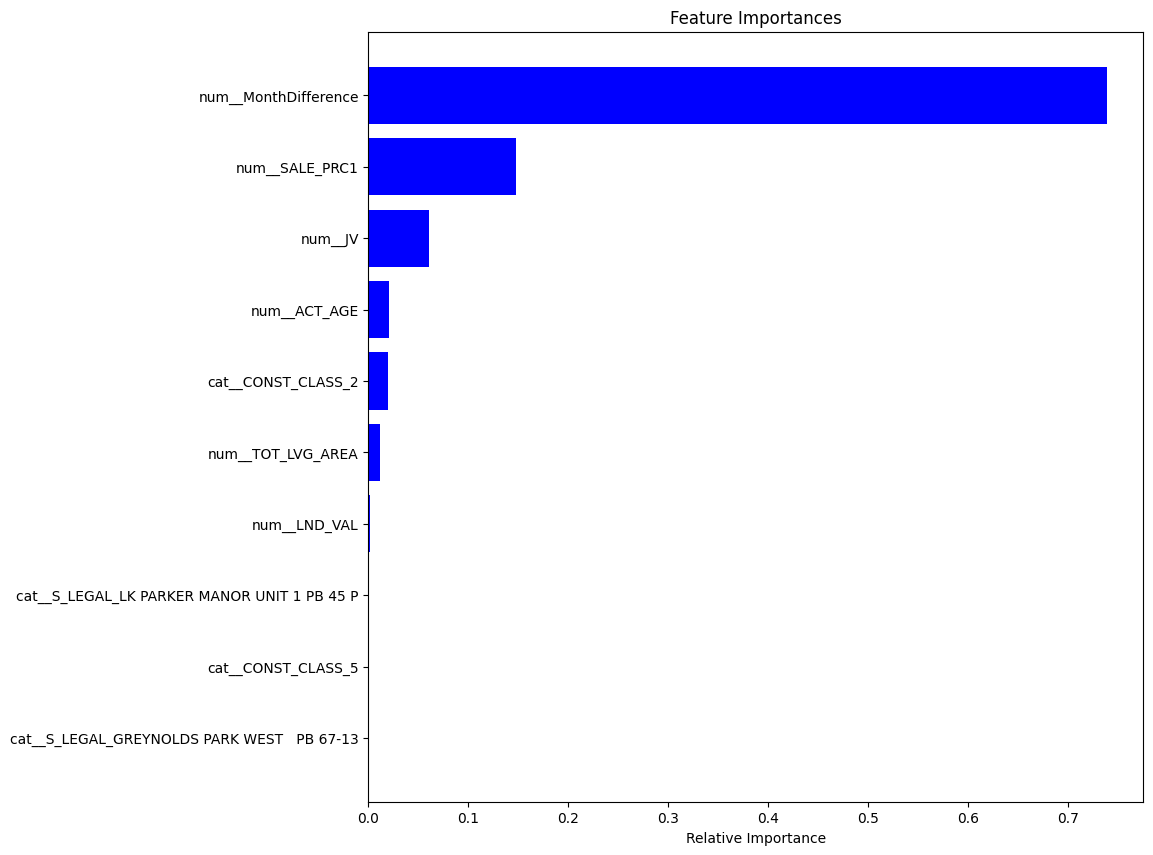

<Figure size 640x480 with 0 Axes>

In [46]:
features = flippers_train_processed.columns
importances = tree_clf.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10 
plt.figure(figsize=(10,10))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
fig1=plt.gcf()
plt.show()
plt.draw()
fig1.savefig('DT_Plot.png', bbox_inches ='tight')

In [47]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [48]:
# test_x1 = test_x.toarray()
# #test_y1 = test_y.toarray()
# type(test_x1), type(test_y)

# Randomized Grid Search

Grid Search helps us try out a combination of different hyperparameters (sometimes randomly)

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {'max_depth': randint(low=5, high=20), 
              'min_samples_leaf': randint(low=5, high=20)}

tree_gs = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, 
                             n_iter=15, cv=5, verbose=1,
                             scoring='accuracy',
                             return_train_score=True)

tree_gs.fit(train_x, train_y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002722605B730>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002722605B6A0>},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [50]:
cvres = tree_gs.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.810042583906543 {'max_depth': 17, 'min_samples_leaf': 19}
0.813006002053047 {'max_depth': 13, 'min_samples_leaf': 13}
0.8226313101555235 {'max_depth': 5, 'min_samples_leaf': 19}
0.8107775244605497 {'max_depth': 16, 'min_samples_leaf': 19}
0.801069275175602 {'max_depth': 16, 'min_samples_leaf': 9}
0.8171548652995966 {'max_depth': 12, 'min_samples_leaf': 18}
0.8226550180739682 {'max_depth': 5, 'min_samples_leaf': 5}
0.8155901405746221 {'max_depth': 13, 'min_samples_leaf': 18}
0.8226313101555235 {'max_depth': 5, 'min_samples_leaf': 19}
0.8226194561963011 {'max_depth': 5, 'min_samples_leaf': 16}
0.8226313101555235 {'max_depth': 5, 'min_samples_leaf': 9}
0.809283933326471 {'max_depth': 15, 'min_samples_leaf': 14}
0.8150448893621572 {'max_depth': 12, 'min_samples_leaf': 7}
0.7982598861373578 {'max_depth': 19, 'min_samples_leaf': 10}
0.8235559217850297 {'max_depth': 6, 'min_samples_leaf': 13}


In [51]:
#Find the best parameter set
tree_gs.best_params_

{'max_depth': 6, 'min_samples_leaf': 13}

In [52]:
tree_gs.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=13)

In [53]:
#Train accuracy:
train_y_pred = tree_gs.best_estimator_.predict(train_x)

print(accuracy_score(train_y, train_y_pred))

0.8272661537914439


In [54]:
#Test accuracy:
test_y_pred = tree_gs.best_estimator_.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.8221595309215621


In [55]:
#Test confusion matrix
confusion_matrix(test_y, test_y_pred)

array([[26369,  1703],
       [ 4727,  3357]], dtype=int64)